## Fundamental Statistics
- Populations and Samples
- Distributions and Kurtosis
- Measures of Centrality: Mean, Median, Mode
- Measures of Spread: Min, Max, Ranges, Mean Absolute Deviation, Variance, Standard Deviation
- Z-Scores for Outlier Detection

### Import Required Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

### Load the Data

In [2]:
# Locate the data file
data_dir = os.path.join(os.getcwd(), 'Data')
source_file = os.path.join(data_dir, 'Female-Controls-Population.csv')

# Read the source from the Web into a Pandas DataFrame.
df = pd.read_csv(source_file, header=0)

# Inspect the file contents
df.head()

,Bodyweight
0,27.03
1,24.80
2,27.02
3,28.07
4,23.55


### Populations

In [3]:
# The population represents all of the observations!
population = df.Bodyweight
print("The entire population contains {0} observations.".format(len(population)))

The entire population contains 225 observations.


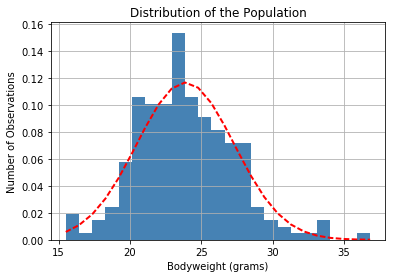

In [4]:
plt.title('Distribution of the Population')
n, bins, patches = plt.hist(population, bins=23, normed=1, color='steelblue')

# Create a 'Best-Fit' Line.
y = mlab.normpdf(bins, population.mean(), population.std())
l = plt.plot(bins, y, 'r--', linewidth=2)

plt.xlabel('Bodyweight (grams)')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.show()

#### Measures of Center (Population)

In [5]:
print("====================================================================")
print("   Center of the Population")
print("====================================================================")
print("-- Average (Mean) Bodyweight: %0.3f" % population.mean())
print("-- Median Bodyweight: %0.3f" % population.median())
print("-- Mode Bodyweight:", population.mode()[0])
print("====================================================================")

   Center of the Population
-- Average (Mean) Bodyweight: 23.893
-- Median Bodyweight: 23.540
-- Mode Bodyweight: 23.39


#### Measures of Spread (Population)

In [21]:
print("====================================================================")
print("   Spread of the Population")
print("====================================================================")
print("-- Minimum: %0.2f" % population.min())
print("-- Maximum: %0.2f" % population.max())
print("-- Range: %0.2f" % abs(population.max() - population.min()))
print("-- Mean Absolute Deviation (MAD): %0.2f" % population.mad())
print("-- Variance: %0.2f" % population.var())
print("-- Standard Deviation: %0.2f" % population.std())
print("====================================================================")

   Spread of the Population
-- Minimum: 15.51
-- Maximum: 36.84
-- Range: 21.33
-- Mean Absolute Deviation (MAD): 2.66
-- Variance: 11.72
-- Standard Deviation: 3.42


#### Detecting Outliers (Population)

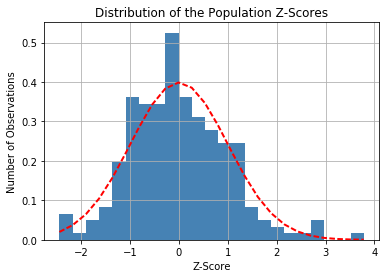

In [7]:
z_score = (population - population.mean())/population.std()

plt.title('Distribution of the Population Z-Scores')
n, bins, patches = plt.hist(z_score, bins=23, normed=1, color='steelblue')

# Create a 'Best-Fit' Line.
y = mlab.normpdf(bins, z_score.mean(), z_score.std())
l = plt.plot(bins, y, 'r--', linewidth=2)

plt.xlabel('Z-Score')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.show()

### Samples and Random Variables

In [8]:
# One Random Sample of 25 observations.
n_observations = 25

sample = df.sample(n_observations, random_state=42).Bodyweight
print("The sample has {0} observations.".format(len(sample)))

The sample has 25 observations.


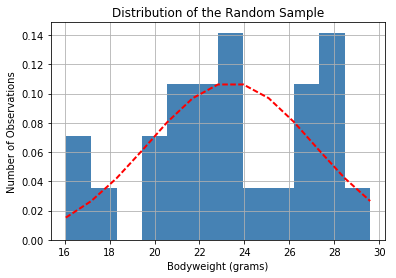

In [9]:
plt.title('Distribution of the Random Sample')
n, bins, patches = plt.hist(sample, bins=12, normed=1, color='steelblue')

y = mlab.normpdf(bins, sample.mean(), sample.std())
l = plt.plot(bins, y, 'r--', linewidth=2)

plt.xlabel('Bodyweight (grams)')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.show()

#### Measures of Center (Random Sample)

In [10]:
print("====================================================================")
print("   Center of the Random Sample")
print("====================================================================")
print("-- Average (Mean) Bodyweight: %0.3f" % sample.mean())
print("-- Median Bodyweight: %0.3f" % sample.median())
print("-- Mode Bodyweight:", sample.mode())
print("====================================================================")

   Center of the Random Sample
-- Average (Mean) Bodyweight: 23.391
-- Median Bodyweight: 23.110
-- Mode Bodyweight: Series([], dtype: float64)


#### Measures of Spread (Random Sample)

In [23]:
print("====================================================================")
print("   Spread of the Random Sample")
print("====================================================================")
print("-- Minimum: %0.2f" % sample.min())
print("-- Maximum: %0.2f" % sample.max())
print("-- Range: %0.2f" % abs(sample.max() - sample.min()))
print("-- Mean Absolute Deviation (MAD): %0.2f" % sample.mad())
print("-- Variance: %0.2f" % sample.var())
print("-- Standard Deviation: %0.2f" % sample.std())
print("====================================================================")

   Spread of the Random Sample
-- Minimum: 16.05
-- Maximum: 29.60
-- Range: 13.55
-- Mean Absolute Deviation (MAD): 3.01
-- Variance: 13.77
-- Standard Deviation: 3.71


#### Detecting Outliers (Random Sample)

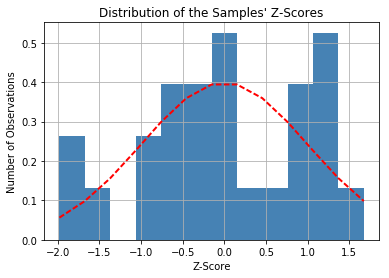

In [12]:
z_score = (sample - sample.mean())/sample.std()

plt.title("Distribution of the Samples' Z-Scores")
n, bins, patches = plt.hist(z_score, bins=12, normed=1, color='steelblue')

# Create a 'Best-Fit' Line.
y = mlab.normpdf(bins, z_score.mean(), z_score.std())
l = plt.plot(bins, y, 'r--', linewidth=2)

plt.xlabel('Z-Score')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.show()

#### Monte Carlo Sampling for Random Variable Analysis

In [26]:
# Let's take 10 samples having 25 observations each.
n_samples = 10
differences = []

for i in range(n_samples):
    # The difference between the mean of a random sample and the population mean.
    differences.append( df.sample(n_observations).mean() - population.mean() )

# Each sample taken has a different Mean value; therefore, it is a Random Variable. 
differences = pd.DataFrame(differences)
differences

,Bodyweight
0,-0.386178
1,0.697822
2,-0.423378
3,1.313422
4,0.451422
5,-0.247778
6,1.086622
7,0.327022
8,-0.647378
9,1.667022


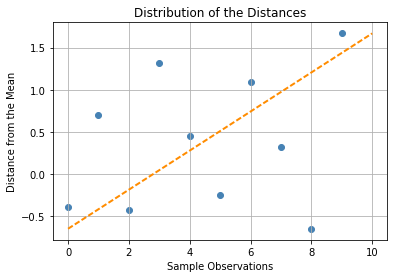

In [27]:
min_diff = differences.Bodyweight.min()
max_diff = differences.Bodyweight.max()

plt.title('Distribution of the Distances')
plt.scatter(range(n_samples), differences.Bodyweight, color='steelblue')

plt.plot([0,10], [min_diff, max_diff], color='darkorange', lw=2, linestyle='--')
plt.xlabel('Sample Observations')
plt.ylabel('Distance from the Mean')
plt.grid(True)
plt.show()

In [15]:
print("====================================================================")
print("The Mean Absolute Difference (MAD) of the Samples is: %0.6f" % abs(differences.Bodyweight.mean()))
print("====================================================================")
print("-- The Minimum Distance is: %0.6f" % min_diff)
print("-- The Maximum Distance is: %0.6f" % max_diff)
print("====================================================================")

The Mean Absolute Difference (MAD) of the Samples is: 0.081178
-- The Minimum Distance is: -1.246178
-- The Maximum Distance is: 1.465422
